In [1]:
import glob

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from scipy.sparse import csr_matrix, save_npz
from scipy.ndimage import label, find_objects


In [2]:
def load_sparse_csr(filename):
    # here we need to add .npz extension manually
    loader = np.load(filename + '.npz')
    return csr_matrix((loader['data'], loader['indices'], loader['indptr']),
                      shape=loader['shape'])


In [3]:
model_loc = "/glade/work/ggantos/reader/holodec-ml/holodecml/reader/models/unet_double_compare/"
z_file_indices = sorted([int(x.replace(".npz", "").split("_")[-1]) for x in glob.glob(f"{model_loc}/data/true_*")])
print(min(z_file_indices))
print(max(z_file_indices))


14072
157928


In [4]:
h_idx = 10
z_idx = z_file_indices[0]
true_array = load_sparse_csr(f"{model_loc}/data/true_{h_idx}_{z_idx}")
true_array.toarray().shape


(4872, 3248)

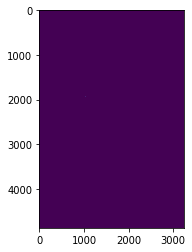

In [5]:
plt.imshow(true_array.toarray())
plt.show()


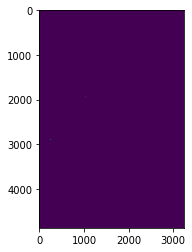

In [6]:
pred_array = load_sparse_csr(f"{model_loc}/data/pred_{h_idx}_{z_idx}")
plt.imshow(pred_array.toarray())
plt.show()


In [8]:
pred_3d = []
true_3d = []
for z_file in z_file_indices:
    pred_2d = load_sparse_csr(f"{model_loc}/data/pred_{h_idx}_{z_file}").toarray()
    pred_3d.append(pred_2d)
    true_2d = load_sparse_csr(f"{model_loc}/data/true_{h_idx}_{z_file}").toarray()
    true_3d.append(true_2d)

pred_3d = np.stack(pred_3d)
true_3d = np.stack(true_3d)
print(pred_3d.shape)
print(true_3d.shape)


(1000, 4872, 3248)
(1000, 4872, 3248)


In [7]:
# Should structure be changed to look at the diagnoals?

labeled_array_pred, num_features_pred = label(pred_3d, structure=None)
np.save(f"{model_loc}/inference/num_features_pred_{h_idx}", num_features_pred)
np.save(f"{model_loc}/inference/labeled_array_pred_{h_idx}", labeled_array_pred)
print(f"Number of features found from predicted masks is {num_features_pred}.")
print(f"Shape of labeled_array_pred {labeled_array_pred.shape}.")


Number of features found from predicted masks is 621.
Shape of labeled_array_pred (1000, 4872, 3248).


In [9]:
labeled_array_true, num_features_true = label(true_3d, structure=None)
np.save(f"{model_loc}/inference/num_features_true_{h_idx}", num_features_true)
np.save(f"{model_loc}/inference/labeled_array_true_{h_idx}", labeled_array_true)
print(f"Number of features found from true masks is {num_features_true}.")
print(f"Shape of labeled_array_true {labeled_array_true.shape}.")


Number of features found from true masks is 499.
Shape of labeled_array_true (1000, 4872, 3248).


In [10]:
labeled_array_pred[0, 1930:1940, 1040:1050]

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [11]:
labeled_array_true[0, 1930:1940, 1040:1050]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [19]:
objects_pred = find_objects(labeled_array_pred)
np.save(f"{model_loc}/inference/objects_pred_{h_idx}", objects_pred)


In [22]:
objects_true = find_objects(labeled_array_true)
np.save(f"{model_loc}/inference/objects_true_{h_idx}", objects_true)


In [10]:
objects_pred = np.load(f"{model_loc}inference/objects_pred_{h_idx}.npy", allow_pickle=True)
objects_true = np.load(f"{model_loc}inference/objects_true_{h_idx}.npy", allow_pickle=True)


In [23]:
labeled_array_pred[objects_pred[0]]

array([[[0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 0],
        [0, 0, 1, 1, 1, 1, 0, 0]],

       [[0, 0, 1, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 1],
        [0, 1, 1, 1, 1, 1, 1, 0]]])

In [11]:
data_path = "/glade/p/cisl/aiml/ai4ess_hackathon/holodec/synthetic_holograms_500particle_gamma_4872x3248_training.nc"
ds = xr.open_dataset(data_path)
ds


<xarray.Dataset>
Dimensions:  (hologram_number: 100, particle: 50000, xsize: 4872, ysize: 3248)
Dimensions without coordinates: hologram_number, particle, xsize, ysize
Data variables:
    hid      (particle) float32 ...
    d        (particle) float32 ...
    x        (particle) float32 ...
    y        (particle) float32 ...
    z        (particle) float32 ...
    n0       (particle) float32 ...
    mu       (particle) float32 ...
    lam      (particle) float32 ...
    distid   (particle) float32 ...
    image    (hologram_number, xsize, ysize) uint8 ...
Attributes:
    DateCreated:           01-Jul-2021
    Nx:                    4872.0
    Ny:                    3248.0
    dx:                    2.96e-06
    dy:                    2.96e-06
    lambda:                3.55e-07
    Dpmin:                 1e-05
    Dpmax:                 0.0001
    zMin:                  0.014
    zMax:                  0.158
    NParticles:            500.0
    Nbits:                 8.0
    ccdelevel:             20000.0
    gainFactor:            24.0
    readNoiseSTD:          12.0
    gaussCornCon:          1.0
    lowPassFiltCutoff:     2500.0
    fracBeamDistort:       0.02
    should_beam:           1
    should_noise:          1
    should_lnoise:         0
    partRelInt:            0.5
    nHolograms:            100.0
    makeRandParts:         1
    should_random:         1
    should_extend_domain:  0
    superSamplingRate:     1.0
    monodisperse:          0.0
    should_cache:          1

In [12]:
# define dataset attributes
dx = ds.attrs['dx']      # horizontal resolution
dy = ds.attrs['dy']      # vertical resolution
Nx = int(ds.attrs['Nx']) # number of horizontal pixels
Ny = int(ds.attrs['Ny']) # number of vertical pixels
zMin = ds.attrs['zMin']  # minimum z in sample volume
zMax = ds.attrs['zMax']
dz = (zMax - zMin) / 1000
ds["d"].attrs


{'longname': 'Particle Diameter', 'units': 'microns'}

In [13]:
(zMax - zMin) / dx

48648.64864864865

In [14]:
# define true particle coordinates
particle_idx = np.where(ds['hid'].values==h_idx+1)

x_part = ds['x'].values[particle_idx]
y_part = ds['y'].values[particle_idx]
z_part = ds['z'].values[particle_idx]
d_part = ds['d'].values[particle_idx]


In [16]:
# TODO fill np.zeroes instead of lists

z_true = []
x_true = []
y_true = []
d_true = []

for obj in objects_true:
    z_true.append(z_file_indices[int(np.mean(obj[0].indices(10000)[:2]))])
    x_true.append(int(np.mean(obj[1].indices(10000)[:2])))
    y_true.append(int(np.mean(obj[2].indices(10000)[:2])))
    
#     d_z = (obj[0].indices(10000)[1] - l[0].indices(10000)[0]) * dz
    d_x = (obj[1].indices(10000)[1] - obj[1].indices(10000)[0]) * dx
    d_y = (obj[2].indices(10000)[1] - obj[2].indices(10000)[0]) * dy
    
    d_true.append(max(d_x, d_y) / 1e-6)

z_true = np.array(z_true)
x_true = np.array(x_true) * dx * 1e6
x_true = x_true - (max(x_true) - min(x_true)) / 2
y_true = np.array(y_true) * dy * 1e6
y_true = y_true - (max(y_true) - min(y_true)) / 2
d_true = np.array(d_true)


In [16]:
# TODO fill np.zeroes instead of lists

z_pred = []
x_pred = []
y_pred = []
d_pred = []

for obj in objects_pred:
    z_pred.append(z_file_indices[int(np.mean(obj[0].indices(10000)[:2]))])
    x_pred.append(int(np.mean(obj[1].indices(10000)[:2])))
    y_pred.append(int(np.mean(obj[2].indices(10000)[:2])))
    
#     d_z = (obj[0].indices(10000)[1] - l[0].indices(10000)[0]) * dz
    d_x = (obj[1].indices(10000)[1] - obj[1].indices(10000)[0]) * dx
    d_y = (obj[2].indices(10000)[1] - obj[2].indices(10000)[0]) * dy
    
    d_pred.append(max(d_x, d_y) / 1e-6)

z_pred = np.array(z_pred)
x_pred = np.array(x_pred) * dx * 1e6
x_pred = x_pred - (max(x_true) - min(x_true)) / 2
y_pred = np.array(y_pred) * dy * 1e6
y_pred = y_pred - (max(y_true) - min(y_true)) / 2
d_pred = np.array(d_pred)


In [18]:
z_pred = []
x_pred = []
y_pred = []
d_pred = []

for obj in objects_pred:
    z_pred.append(z_file_indices[int(np.mean(obj[0].indices(10000)[:2]))])
    x_pred.append(int(np.mean(obj[1].indices(10000)[:2])))
    y_pred.append(int(np.mean(obj[2].indices(10000)[:2])))
    
#     d_z = (obj[0].indices(10000)[1] - l[0].indices(10000)[0]) * dz
    d_x = (obj[1].indices(10000)[1] - obj[1].indices(10000)[0]) * dx
    
    d_y = (obj[2].indices(10000)[1] - obj[2].indices(10000)[0]) * dy
    
    d_pred.append(max(d_x, d_y) / 1e-6)

z_pred = np.array(z_pred)
x_pred = np.array(x_pred) * dx * 1e6
x_pred = x_pred - (max(x_true) - min(x_true)) / 2
y_pred = np.array(y_pred) * dy * 1e6
y_pred = y_pred - (max(y_true) - min(y_true)) / 2
d_pred = np.array(d_pred)

In [19]:
print(max(z_part))
print(max(z_true))
print(max(z_pred))

print(min(z_part))
print(min(z_true))
print(min(z_pred))

157904.2
157928
157784
14040.625
14072
14216


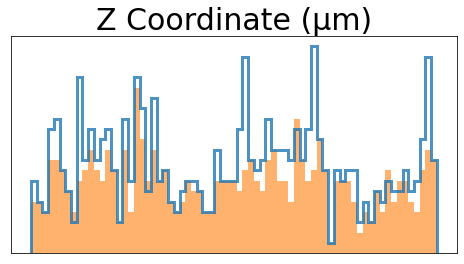

In [75]:
# predicted mask histogram (use step), axis labels, etc

plt.figure(figsize=(8,4))
plt.hist(z_pred, bins=np.arange(14000,158000,2000), alpha=0.8, label='Predicted', histtype='step', linewidth=3)
plt.hist(z_true, bins=np.arange(14000,158000,2000), alpha=0.6, label='True')
# plt.hist(z_part, bins=np.arange(14000,158000,2000), alpha=0.6, label='true')
# plt.xlabel('z-coordinate (µm)')
plt.title("Z Coordinate (µm)", fontsize=30)
plt.xticks([])
plt.yticks([])
# plt.legend()
plt.savefig(f"{model_loc}inference/hist_z_{h_idx}.png")
plt.show()


In [30]:
print(max(d_part))
print(max(d_true))
print(max(d_pred))

print(min(d_part))
print(min(d_true))
print(min(d_pred))

128.26617
130.24
130.24
2.586472
2.96
2.96


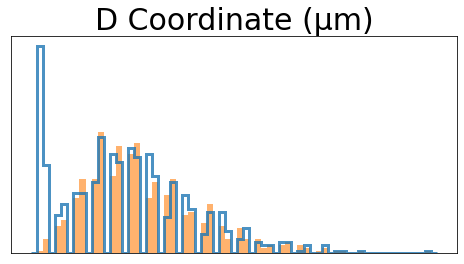

In [74]:
# predicted mask histogram (use step), axis labels, etc

plt.figure(figsize=(8,4))
plt.hist(d_pred, bins=np.arange(0,136,2), alpha=0.8, label='Predicted', histtype='step', linewidth=3)
plt.hist(d_true, bins=np.arange(0,136,2), alpha=0.6, label='True')
# plt.hist(d_part, bins=np.arange(0,136,2), alpha=0.6, label='true')
# plt.xlabel('diameter (µm)')
plt.title("D Coordinate (µm)", fontsize=30)
plt.xticks([])
plt.yticks([])
# plt.legend()
plt.savefig(f"{model_loc}inference/hist_d_{h_idx}.png")
plt.show()


In [32]:
print(max(y_part))
print(max(y_true))
print(max(y_pred))

print(min(y_part))
print(min(y_true))
print(min(y_pred))

4767.8467
4795.2
4801.120000000001
-4794.712
-4765.6
-4768.5599999999995


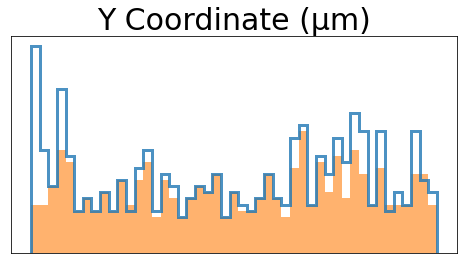

In [73]:
# predicted mask histogram (use step), axis labels, etc

plt.figure(figsize=(8,4))
plt.hist(y_pred, bins=np.arange(-4800,4800,200), alpha=0.8, label='Predicted', histtype='step', linewidth=3)
plt.hist(y_true, bins=np.arange(-4800,4800,200), alpha=0.6, label='True')
# plt.hist(y_part, bins=np.arange(-4800,4800,200), alpha=0.6, label='true')
# plt.xlabel('y-coordinate (µm)')
plt.title("Y Coordinate (µm)", fontsize=30)
plt.xticks([])
plt.yticks([])
# plt.legend()
plt.savefig(f"{model_loc}inference/hist_y_{h_idx}.png")
plt.show()


In [34]:
print(max(x_part))
print(max(x_true))
print(max(x_pred))

print(min(x_part))
print(min(x_true))
print(min(x_pred))

7148.068
7183.92
7243.119999999999
-7203.6284
-7166.160000000001
-7166.160000000001


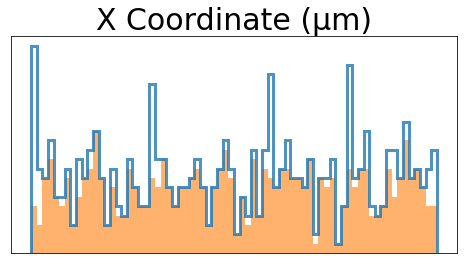

In [72]:
# predicted mask histogram (use step), axis labels, etc

plt.figure(figsize=(8,4))
plt.hist(x_pred, bins=np.arange(-7300,7300,200), alpha=0.8, label='Predicted', histtype='step', linewidth=3)
plt.hist(x_true, bins=np.arange(-7300,7300,200), alpha=0.6, label='True')
# plt.hist(x_part, bins=np.arange(-7300,7300,200), alpha=0.6, label='true')
# plt.xlabel('x-coordinate (µm)')
plt.title("X Coordinate (µm)", fontsize=30)
plt.xticks([])
plt.yticks([])
# plt.legend()
plt.savefig(f"{model_loc}inference/hist_x_{h_idx}.png")
plt.show()


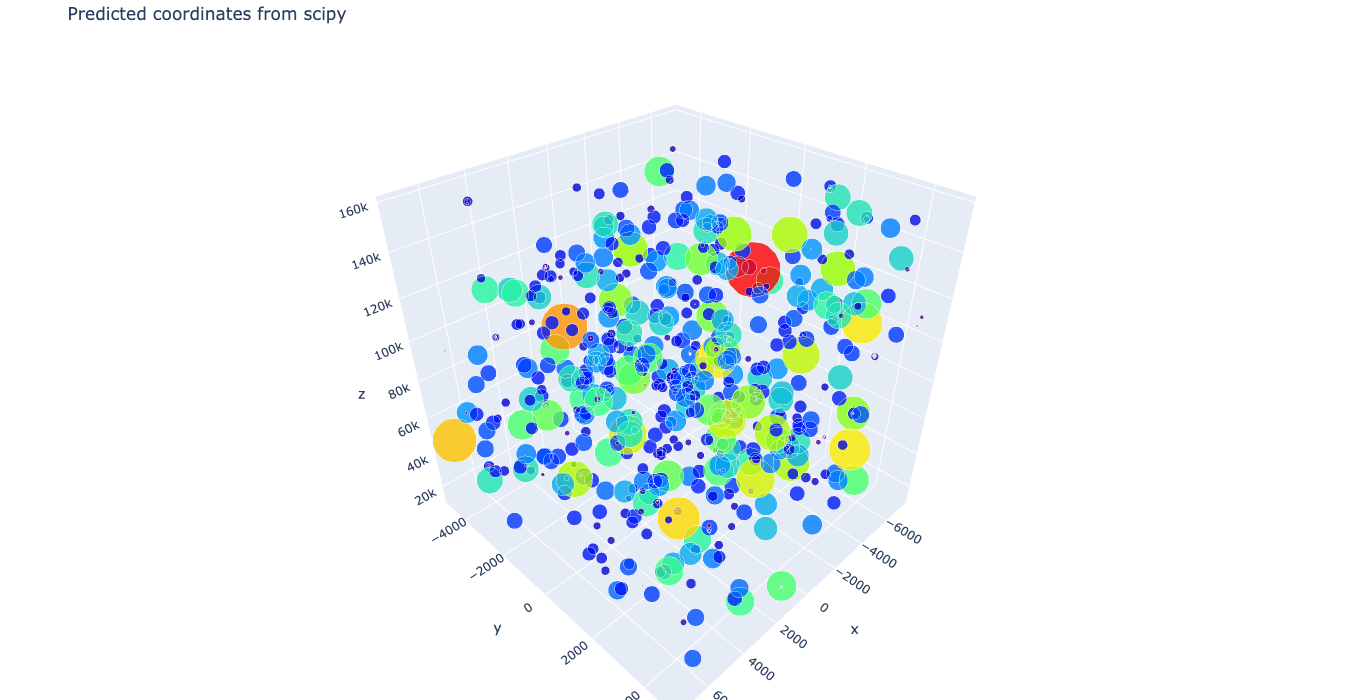

In [40]:
data = [go.Scatter3d(x=x_pred,
                     y=y_pred,
                     z=z_pred,
                     mode='markers',
                     marker=dict(size=d_pred/2,
                                 color=d_pred,
                                 colorscale='Rainbow',
                                 opacity=0.8),
                     text = [f"diameter: {d_pred_i}" for d_pred_i in d_pred])]

layout = go.Layout(title='Predicted coordinates from scipy',
                   autosize=True,
                   width=700,
                   height=700,
                   xaxis= go.layout.XAxis(linecolor = 'black',
                                          linewidth = 1,
                                          mirror = True),
                   yaxis= go.layout.YAxis(linecolor = 'black',
                                          linewidth = 1,
                                          mirror = True),
                   margin=go.layout.Margin(
                        l=0,
                        r=0,
                        b=0,
                        t=40
                   )
                   )

fig = go.Figure(data=data, layout=layout)
fig.update_layout(scene_aspectmode='manual',
                  scene_aspectratio=dict(x=1, y=1, z=1))
fig.update_layout(hovermode="x")
fig.show()


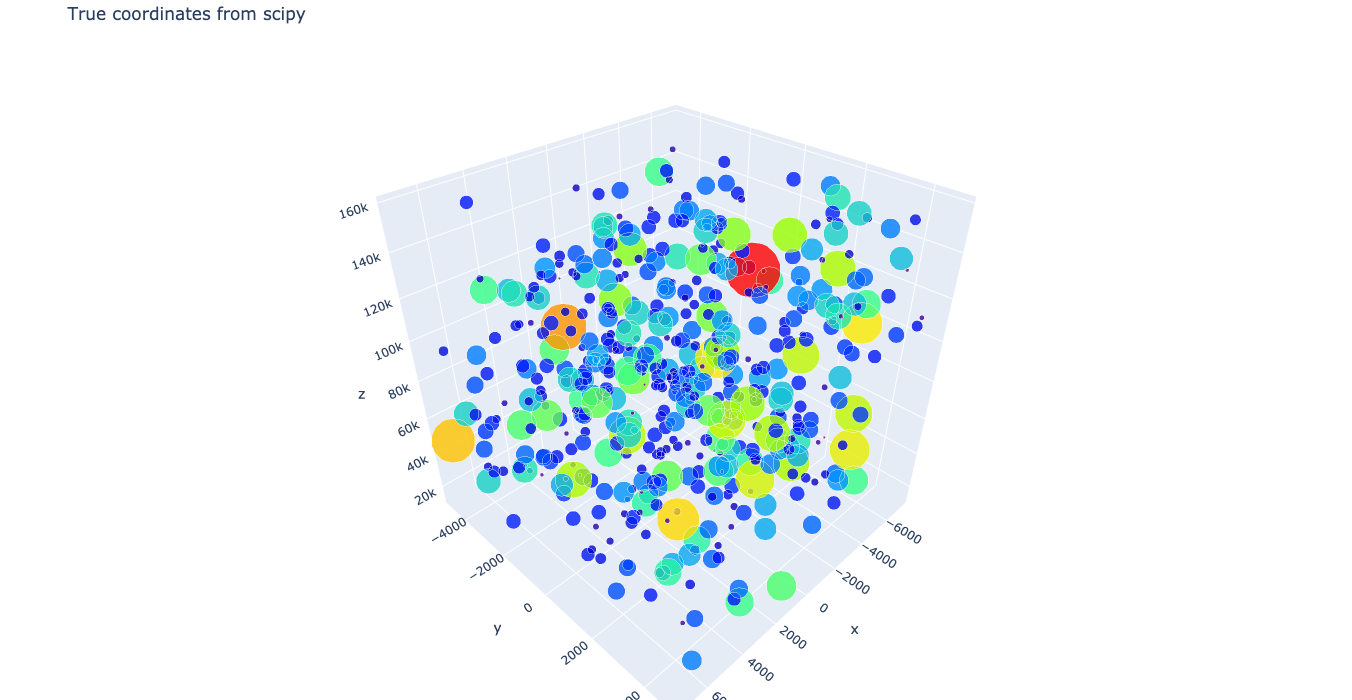

In [41]:
data = [go.Scatter3d(x=x_true,
                     y=y_true,
                     z=z_true,
                     mode='markers',
                     marker=dict(size=d_true/2,
                                 color=d_true,
                                 colorscale='Rainbow',
                                 opacity=0.8),
                     text = [f"diameter: {d_true_i}" for d_true_i in d_true])]

layout = go.Layout(title='True coordinates from scipy',
                   autosize=True,
                   width=700,
                   height=700,
                   xaxis= go.layout.XAxis(linecolor = 'black',
                                          linewidth = 1,
                                          mirror = True),
                   yaxis= go.layout.YAxis(linecolor = 'black',
                                          linewidth = 1,
                                          mirror = True),
                   margin=go.layout.Margin(
                        l=0,
                        r=0,
                        b=0,
                        t=40
                   )
                   )

fig = go.Figure(data=data, layout=layout)
fig.update_layout(scene_aspectmode='manual',
                  scene_aspectratio=dict(x=1, y=1, z=1))
fig.update_layout(hovermode="x")
fig.show()


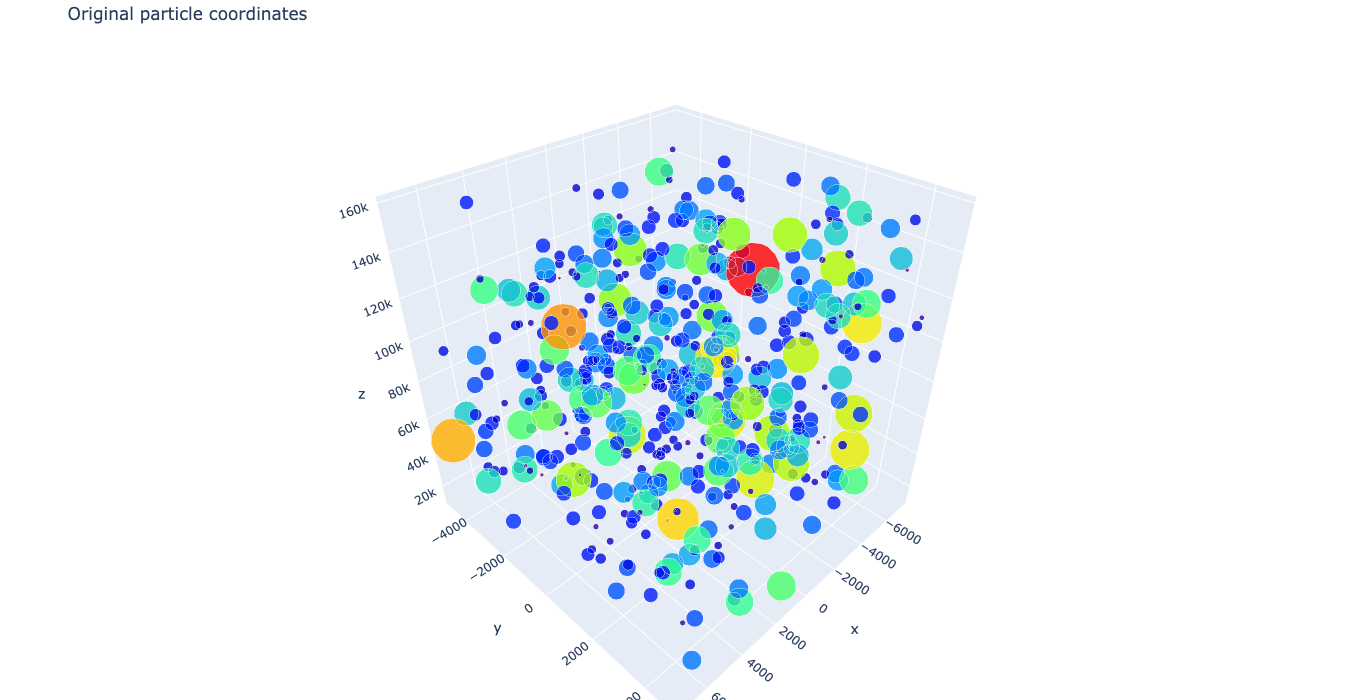

In [42]:
data = [go.Scatter3d(x=x_part,
                     y=y_part,
                     z=z_part,
                     mode='markers',
                     marker=dict(size=d_part/2,
                                 color=d_part,
                                 colorscale='Rainbow',
                                 opacity=0.8),
                     text = [f"diameter: {d_part_i}" for d_part_i in d_part])]

layout = go.Layout(title='Original particle coordinates',
                   autosize=True,
                   width=700,
                   height=700,
                   xaxis= go.layout.XAxis(linecolor = 'black',
                                          linewidth = 1,
                                          mirror = True),
                   yaxis= go.layout.YAxis(linecolor = 'black',
                                          linewidth = 1,
                                          mirror = True),
                   margin=go.layout.Margin(
                        l=0,
                        r=0,
                        b=0,
                        t=40
                   )
                   )

fig = go.Figure(data=data, layout=layout)
fig.update_layout(scene_aspectmode='manual',
                  scene_aspectratio=dict(x=1, y=1, z=1))
fig.update_layout(hovermode="x")
fig.show()


# Calculating the Euclidian Distance

In [76]:
part_xyz = np.stack((x_part, y_part, z_part, d_part), axis=1)
true_xyz = np.stack((x_true, y_true, z_true, d_true), axis=1)
pred_xyz = np.stack((x_pred, y_pred, z_pred, d_pred), axis=1)
part_xyz.shape

(500, 4)

In [85]:
distances = []
maes = []
idx_mins = []
for p in pred_xyz:
    dist_min = 1000000000
    idx_min = 0
    mae = 0
    for i,t in enumerate(part_xyz):
        dist = np.sqrt(np.sum((t - p) ** 2, axis=0))
        if dist < dist_min:
            dist_min = dist
            idx_min = i
            mae = np.sum(np.abs(t - p), axis=0)
    distances.append(dist)
    maes.append(mae)
    idx_mins.append(idx_min)
    
distances = np.array(distances)
maes = np.array(maes)
idx_mins = np.array(idx_mins)
      

In [86]:
# xyzd or xylog(z/d)

print(f"Count of unique true particles that have been matched with predicted particles: {np.unique(idx_mins).shape[0]}")


Count of unique true particles that have been matched with predicted particles: 499


In [87]:
idx_mins

array([182, 355, 197, 112, 112, 215, 194, 267, 273, 161, 215, 473, 300,
       121, 166, 188, 120, 382, 429, 315, 243, 492, 418, 115, 115, 115,
       115, 115, 275, 263, 244, 275, 275, 195,  83, 489, 191, 191, 362,
       250,  54, 422, 499,  72, 248, 373, 462,  66,  38, 389, 417, 280,
       254,  60, 308, 353, 410, 411,  95, 375, 340, 185, 185, 185, 185,
       185, 185, 185, 185, 185, 321, 126, 361, 185, 236, 460, 185, 468,
       468, 310, 390, 160, 404, 122, 380, 497, 256, 370, 149,  53, 218,
       424,  17,  34, 109, 475, 475, 457, 225, 216,  12, 136,  12, 179,
         9,  12, 234, 168, 442, 192, 360, 223, 223, 223, 493, 223, 107,
       223, 393, 264, 349, 403,  45, 262,  52, 386, 211, 344, 366, 294,
       165,  94, 345, 279, 279, 147,  80, 155, 313, 454,  65, 316,  25,
       268, 465,  55, 190, 479, 111,  47,  47,  47,  47,  47, 419,  47,
       150, 110, 384, 436, 320, 242, 217,  42, 419, 419, 356, 369,   1,
       433, 200, 383,  91, 469,  10,  76, 372,  93,  43, 477, 23

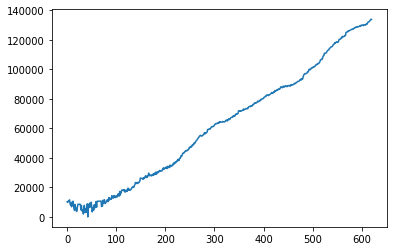

In [79]:
plt.plot(distances)

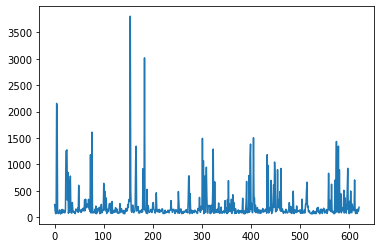

In [80]:
plt.plot(maes)

In [81]:
mae_pred = 0
idx_unique = []
for u in np.unique(idx_mins):
    idx_u = np.where(idx_mins == u)[0]
    idx_min = np.argmin(distances[idx_u])
    mae_pred += maes[idx_u[idx_min]]
    idx_unique.append(idx_u[idx_min])
idx_unique = np.array(idx_unique)
mae_pred

80694.82372501362

In [82]:
print(f"MAE of predicted vs true particles once they have been matched: {mae_pred:,.0f}")

MAE of predicted vs true particles once they have been matched: 80,695
